# Лабораторная работа №2. Бинарный классификатор
Пан Анатолий Эдуардович<br>
Группа 932209<br>
CIFAR-10

##1. Импорт необходимых модулей и библиотек

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## 2. Загрузка датасета CIFAR-10

In [138]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Выбор двух классов для бинарной классификации

In [139]:
class_1 = 0  # Например, класс "Самолет"
class_2 = 1  # Например, класс "Автомобиль"

Фильтрация данных для выбранных классов

In [140]:
x_train = x_train[(y_train[:, 0] == class_1) | (y_train[:, 0] == class_2)]
y_train = y_train[(y_train[:, 0] == class_1) | (y_train[:, 0] == class_2)]
y_train = (y_train == class_1).astype(np.int32)  # Преобразование меток в бинарные

In [141]:
x_test = x_test[(y_test[:, 0] == class_1) | (y_test[:, 0] == class_2)]
y_test = y_test[(y_test[:, 0] == class_1) | (y_test[:, 0] == class_2)]
y_test = (y_test == class_1).astype(np.int32)  # Преобразование меток в бинарные

##3. Масштабирование значений пикселей к диапазону [0, 1]

In [142]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

Разделение данных на тренировочный и валидационный наборы

In [143]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [144]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 32, 32, 3)
(8000, 1)
(2000, 32, 32, 3)
(2000, 1)


##4. Создание модели полносвязной нейронной сети

In [145]:
model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Входной слой
    layers.Dense(128, activation="relu"),    # Полносвязный слой с 128 нейронами и функцией активации ReLU
    # layers.Dense(256, activation="relu"),    # Полносвязный слой с 256 нейронами и функцией активации ReLU
    # layers.Dense(512, activation="relu"),    # Полносвязный слой с 512 нейронами и функцией активации ReLU
    layers.Dropout(0.5),                     # Добавление dropout для регуляризации
    layers.Dense(1, activation="sigmoid")    # Выходной слой с 1 нейроном и функцией активации sigmoid (бинарная классификация)
])

##5. Компиляция модели

In [146]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [147]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 dense_22 (Dense)            (None, 128)               393344    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 393473 (1.50 MB)
Trainable params: 393473 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##6. Обучение модели

In [148]:
epochs = 20
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=64,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/20
125/125 [==============================] - 1s 6ms/step - loss: 0.6148 - accuracy: 0.6870 - val_loss: 0.4892 - val_accuracy: 0.7645
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 0.5056 - accuracy: 0.7517 - val_loss: 0.4575 - val_accuracy: 0.7835
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 0.4877 - accuracy: 0.7609 - val_loss: 0.4445 - val_accuracy: 0.7765
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 0.4659 - accuracy: 0.7768 - val_loss: 0.4294 - val_accuracy: 0.7960
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.4532 - accuracy: 0.7876 - val_loss: 0.4469 - val_accuracy: 0.7780
Epoch 6/20
125/125 [==============================] - 1s 5ms/step - loss: 0.4404 - accuracy: 0.7878 - val_loss: 0.4160 - val_accuracy: 0.8095
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 0.4483 - accuracy: 0.7884 - val_loss: 0.4217 - val_accuracy: 0.8005
Epoch 

##7. Оценка модели на тестовых данных

In [149]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Точность на тестовых данных: {test_acc * 100:.2f}%")

63/63 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8215
Точность на тестовых данных: 82.15%


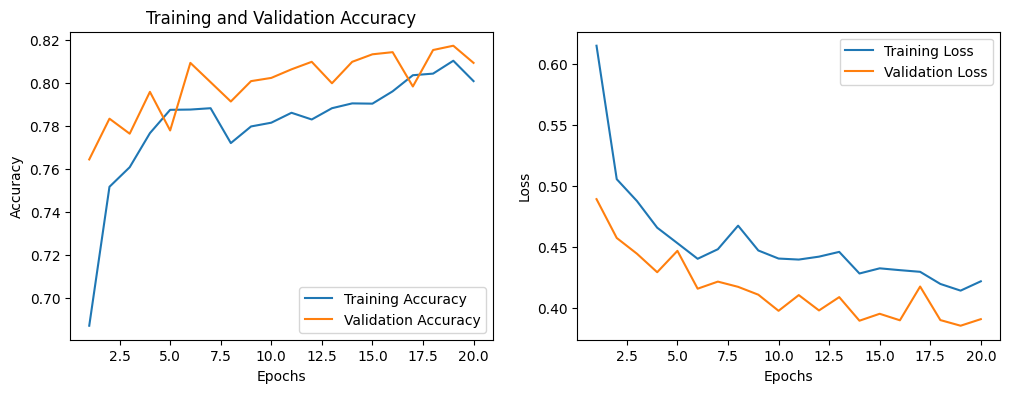

In [150]:
# График точности на тренировочных и валидационных данных
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), history.history["accuracy"], label="Training Accuracy")
plt.plot(range(1, epochs + 1), history.history["val_accuracy"], label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# График (loss) функции потерь на тренировочных и валидационных данных
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), history.history["loss"], label="Training Loss")
plt.plot(range(1, epochs + 1), history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()